In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

## Đọc dữ liệu

In [3]:
df = pd.read_csv("output/data.csv")
df

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,...,TotalTests,Tests/1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,China,203334,2680,4776,51,169380,2982,29178,274,141,...,160000000,111163,1439323776,Asia,7079,301366,9,2.0,0.04,20.0
1,USA,82747175,38858,1018718,186,80506860,41509,1221597,1415,247359,...,1001729381,2994507,334522343,North America,4,328,0,116.0,0.60,3652.0
2,India,43062097,2011,522223,0,42523311,1970,16563,698,30658,...,834717702,594272,1404606308,Asia,33,2690,2,1.0,0.00,12.0
3,Brazil,30355919,6456,662777,76,29411813,27459,281329,8318,140994,...,63776166,296221,215299307,South America,7,325,3,30.0,0.40,1307.0
4,France,28317915,13984,145257,197,26083461,202981,2089197,1677,432101,...,266484045,4066260,65535419,Europe,2,451,0,213.0,3.00,31879.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,MS Zaandam,9,0,2,0,7,0,0,0,0,...,0,0,0,NaN,0,0,0,0.0,0.00,0.0
224,Niue,8,0,0,0,7,0,1,0,4860,...,0,0,1646,Australia/Oceania,206,0,0,0.0,0.00,608.0
225,Micronesia,3,2,0,0,1,0,2,0,26,...,0,0,117209,Australia/Oceania,39070,0,0,17.0,0.00,17.0
226,Nauru,3,0,0,0,3,0,0,0,274,...,0,0,10947,Australia/Oceania,3649,0,0,0.0,0.00,0.0


## 4. Phần trăm ca nhiễm theo từng khu vực

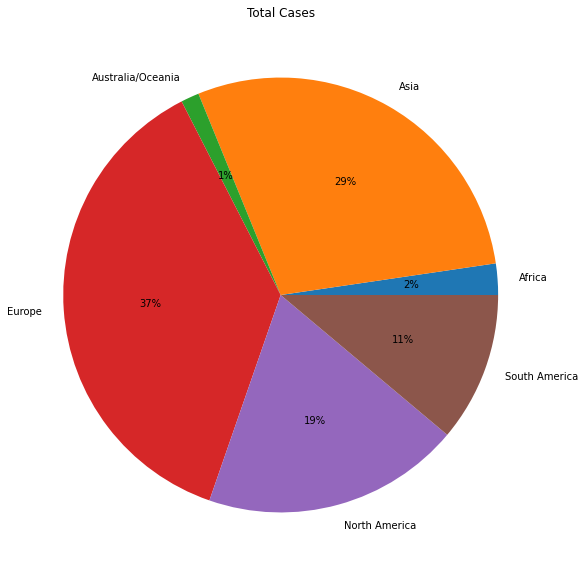

In [4]:
# chuẩn bị dữ liệu
TotalCases_Continent = df.groupby(["Continent"])["TotalCases"].sum()
TotalCases_Continent = TotalCases_Continent.reset_index()

# Vẽ biểu đồ
fig = plt.figure(figsize =(10, 10))
plt.title("Total Cases")
plt.pie(TotalCases_Continent["TotalCases"], labels = TotalCases_Continent["Continent"], autopct='%1.0f%%')
plt.show()

## 5. Phần trăm ca chết theo từng khu vực

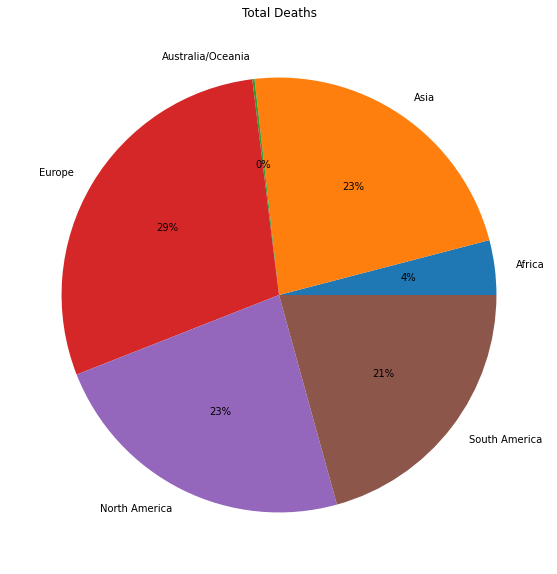

In [5]:
# chuẩn bị dữ liệu
TotalCases_Continent = df.groupby(["Continent"])["TotalDeaths"].sum()
TotalCases_Continent = TotalCases_Continent.reset_index()

# Vẽ biểu đồ
fig = plt.figure(figsize =(10, 10))
plt.title("Total Deaths")
plt.pie(TotalCases_Continent["TotalDeaths"], labels = TotalCases_Continent["Continent"], autopct='%1.0f%%')
plt.show()

## 6. Phần trăm ca hồi phục theo từng khu vực

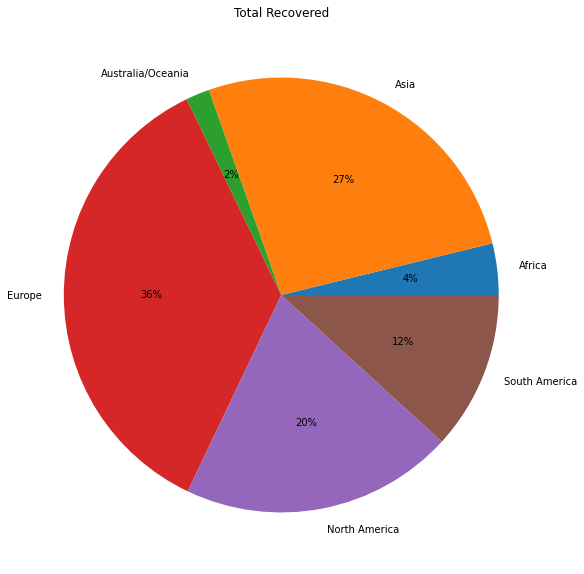

In [6]:
# chuẩn bị dữ liệu
TotalCases_Continent = df.groupby(["Continent"])["TotalRecovered"].sum()
TotalCases_Continent = TotalCases_Continent.reset_index()

# Vẽ biểu đồ
fig = plt.figure(figsize =(10, 10))
plt.title("Total Recovered")
plt.pie(TotalCases_Continent["TotalRecovered"], labels = TotalCases_Continent["Continent"], autopct='%1.0f%%')
plt.show()

## x. Mối liên hệ giữa dân số với tổng ca bệnh của từng châu lục

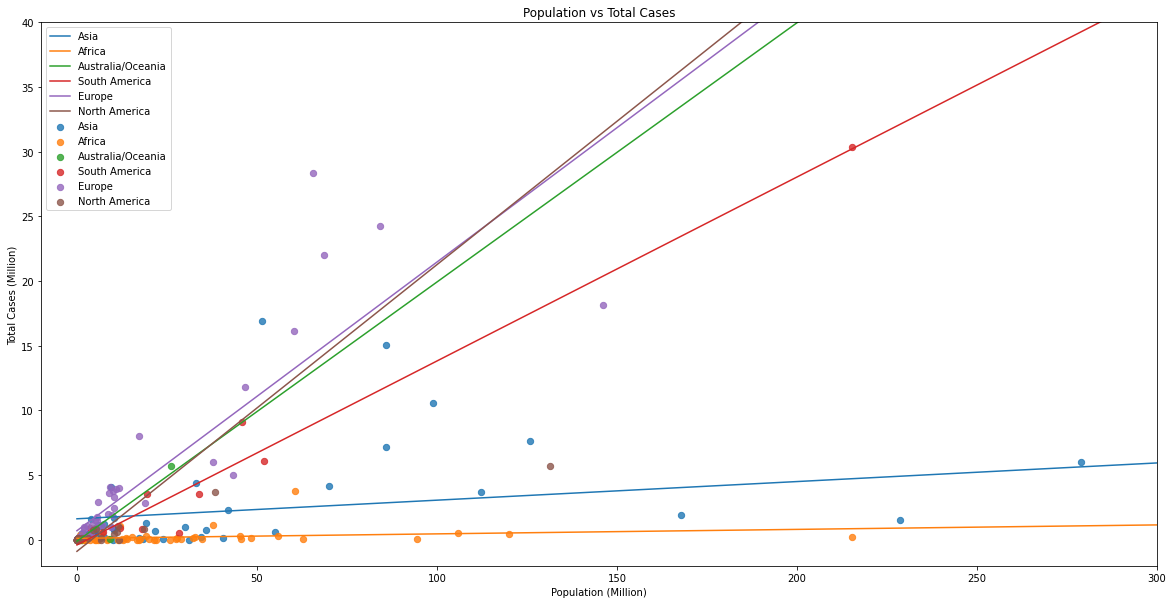

In [7]:
# chuẩn bị dữ liệu
TotalCases_Population_Continent = df[["TotalCases", "Population"]]/1000000
TotalCases_Population_Continent["Continent"] = df["Continent"]
Continents = set(TotalCases_Population_Continent["Continent"])
Continents.pop() # delete nan

fig = plt.figure(figsize =(20,10))
plt.title("Population vs Total Cases")
plt.xlabel("Population (Million)")
plt.ylabel("Total Cases (Million)")

plt.axis([-10, 300, -2, 40])
for i in Continents:
    new_TotalCases_Population_Continent = TotalCases_Population_Continent[TotalCases_Population_Continent["Continent"] == i]
    plt.scatter(new_TotalCases_Population_Continent["Population"], new_TotalCases_Population_Continent["TotalCases"], label = i, alpha=0.8, s = 40)
    # Linear Regression
    X = np.array([new_TotalCases_Population_Continent["Population"]]).T
    y = np.array([new_TotalCases_Population_Continent["TotalCases"]]).T
    one = np.ones((X.shape[0], 1))
    Xbar = np.concatenate((one, X), axis = 1)
    regr = linear_model.LinearRegression(fit_intercept=False) # fit_intercept = False for calculating the bias
    regr.fit(Xbar, y)

    # vễ biểu đồ
    x0 = np.linspace(0, 300, 2)
    y0 = regr.coef_[0,0] + regr.coef_[0,1] * x0
    plt.plot(x0,y0 , label = i)


plt.legend()
plt.show()

## x. Mối liên hệ giữa tổng ca nhiễm và ca chết của từng châu lục

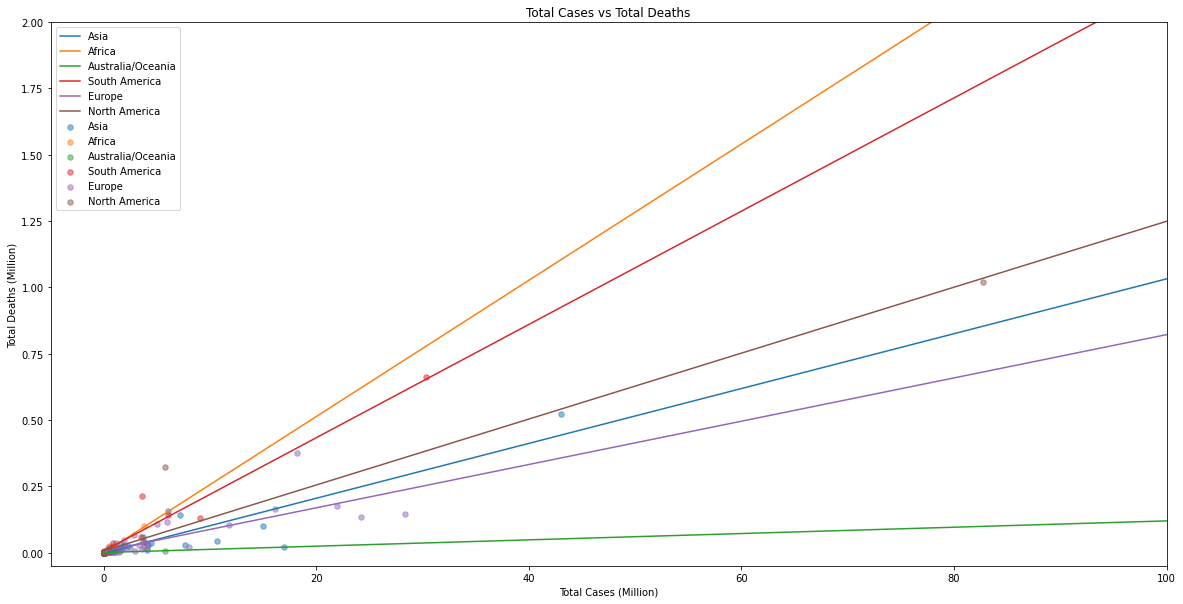

In [8]:
# Chuẩn bị dữ liệu
TotalCases_TotalDeaths_Continent = df[["TotalCases", "TotalDeaths"]]/1000000
TotalCases_TotalDeaths_Continent["Continent"] = df["Continent"]
Continents = set(TotalCases_TotalDeaths_Continent["Continent"])
Continents.pop() # delete nan


fig = plt.figure(figsize =(20,10))
for i in Continents:
    new_TotalCases_TotalDeaths_Continent = TotalCases_TotalDeaths_Continent[TotalCases_TotalDeaths_Continent["Continent"] == i]

    plt.scatter(new_TotalCases_TotalDeaths_Continent["TotalCases"], new_TotalCases_TotalDeaths_Continent["TotalDeaths"], label = i, alpha=0.5, s = 30)

    # Linear Regression
    X = np.array([new_TotalCases_TotalDeaths_Continent["TotalCases"]]).T
    y = np.array([new_TotalCases_TotalDeaths_Continent["TotalDeaths"]]).T
    one = np.ones((X.shape[0], 1))
    Xbar = np.concatenate((one, X), axis = 1)
    regr = linear_model.LinearRegression(fit_intercept=False) # fit_intercept = False for calculating the bias
    regr.fit(Xbar, y)

    # vễ biểu đồ
    x0 = np.linspace(0, 100, 2)
    y0 = regr.coef_[0,0] + regr.coef_[0,1] * x0
    plt.plot(x0,y0 , label = i)

plt.axis([-5, 100, -0.05, 2])
plt.title("Total Cases vs Total Deaths")
plt.xlabel("Total Cases (Million)")
plt.ylabel("Total Deaths (Million)")
plt.legend()
plt.show()    

## x. Mối liên hệ giữa số ca nhiễm mới và số ca hồi phục mới theo từng châu lục

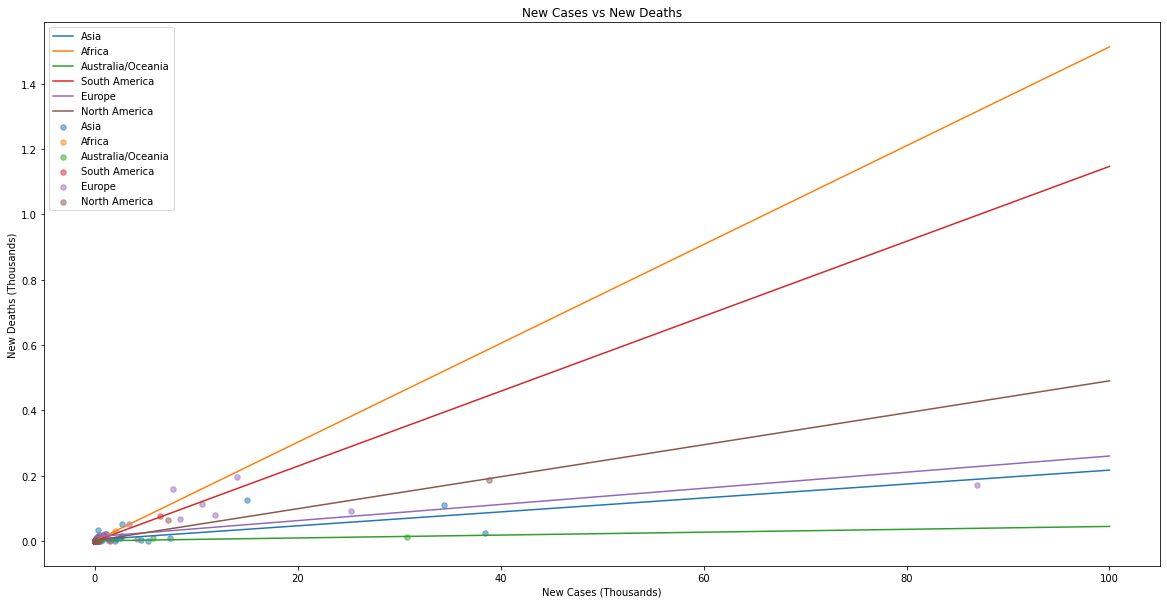

In [9]:
# Chuẩn bị dữ liệu
NewCases_NewDeaths_Continent = df[["NewCases", "NewDeaths"]]/1000
NewCases_NewDeaths_Continent["Continent"] = df["Continent"]
Continents = set(NewCases_NewDeaths_Continent["Continent"])
Continents.pop() # delete nan


fig = plt.figure(figsize =(20,10))
for i in Continents:
    new_NewCases_NewDeaths_Continent = NewCases_NewDeaths_Continent[NewCases_NewDeaths_Continent["Continent"] == i]

    plt.scatter(new_NewCases_NewDeaths_Continent["NewCases"], new_NewCases_NewDeaths_Continent["NewDeaths"], label = i, alpha=0.5, s = 30)

    # Linear Regression
    X = np.array([new_NewCases_NewDeaths_Continent["NewCases"]]).T
    y = np.array([new_NewCases_NewDeaths_Continent["NewDeaths"]]).T
    one = np.ones((X.shape[0], 1))
    Xbar = np.concatenate((one, X), axis = 1)
    regr = linear_model.LinearRegression(fit_intercept=False) # fit_intercept = False for calculating the bias
    regr.fit(Xbar, y)

    # vễ biểu đồ
    x0 = np.linspace(0, 100, 2)
    y0 = regr.coef_[0,0] + regr.coef_[0,1] * x0
    plt.plot(x0,y0 , label = i)

#plt.axis([-5, 100, -0.05, 2])
plt.title("New Cases vs New Deaths")
plt.xlabel("New Cases (Thousands)")
plt.ylabel("New Deaths (Thousands)")
plt.legend()
plt.show() 

## x. Tỉ lệ chết / tổng nhiễm của từng châu lục

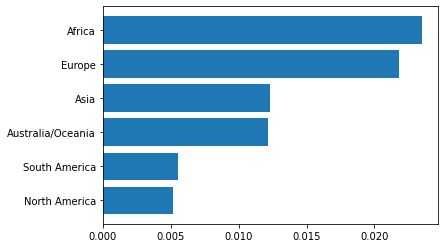

In [10]:
# chuẩn bị dữ liệu
TotalDeaths_div_TotalCases_Continent = df[["Continent", "TotalCases", "TotalDeaths"]]
TotalDeaths_div_TotalCases_Continent = df.groupby(["Continent"]).sum()
TotalDeaths_div_TotalCases_Continent = TotalDeaths_div_TotalCases_Continent.reset_index()
TotalDeaths_div_TotalCases_Continent["TotalDeaths/TotalCases"] = df["TotalDeaths"]/df["TotalCases"]
TotalDeaths_div_TotalCases_Continent = TotalDeaths_div_TotalCases_Continent.sort_values(by="TotalDeaths/TotalCases")

# vẽ biểu đồ
#fig = plt.figure(figsize =(15,35))
plt.barh(TotalDeaths_div_TotalCases_Continent["Continent"], width= TotalDeaths_div_TotalCases_Continent["TotalDeaths/TotalCases"])
plt.show()

## x. Ca nhiễm và ca chết

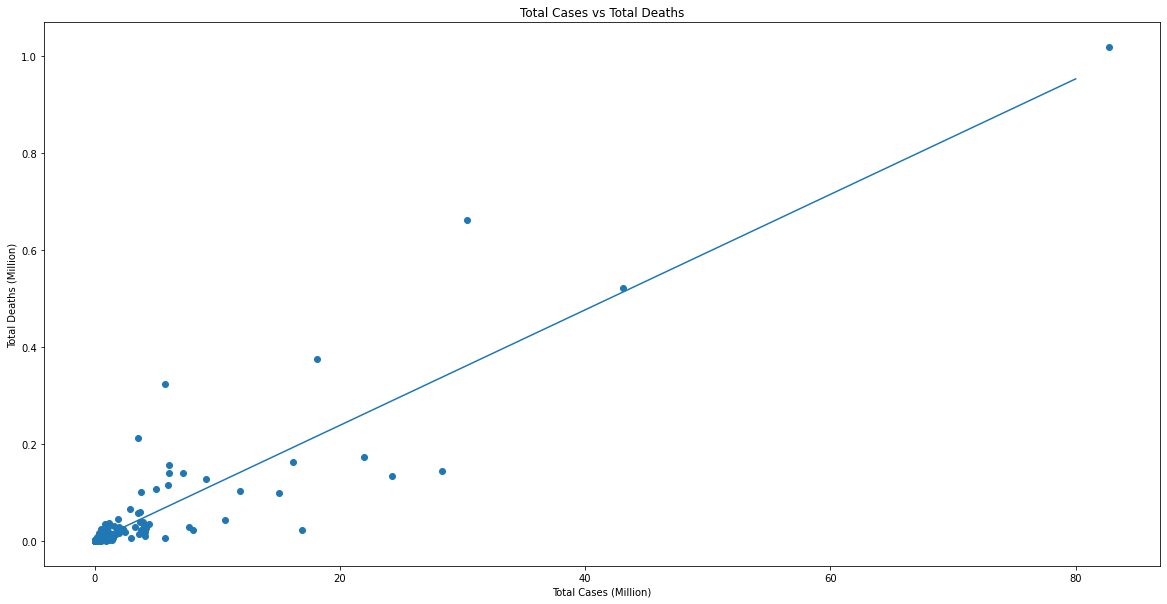

In [28]:
# Chuẩn bị dữ liệu
TotalCases_TotalDeaths = df[["TotalCases", "TotalDeaths"]]/1000000



# Linear Regression
X = np.array([TotalCases_TotalDeaths["TotalCases"]]).T
y = np.array([TotalCases_TotalDeaths["TotalDeaths"]]).T
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1)
regr = linear_model.LinearRegression(fit_intercept=False) # fit_intercept = False for calculating the bias
regr.fit(Xbar, y)

# vễ biểu đồ
x0 = np.linspace(0, 80, 2)
y0 = regr.coef_[0,0] + regr.coef_[0,1] * x0

fig = plt.figure(figsize =(20,10))
plt.scatter(TotalCases_TotalDeaths["TotalCases"], TotalCases_TotalDeaths["TotalDeaths"])
plt.plot(x0,y0)

#plt.axis([-5, 100, -0.05, 2])
plt.title("Total Cases vs Total Deaths")
plt.xlabel("Total Cases (Million)")
plt.ylabel("Total Deaths (Million)")
plt.show() 

## X. Ca nhiễm và ca hồi phục

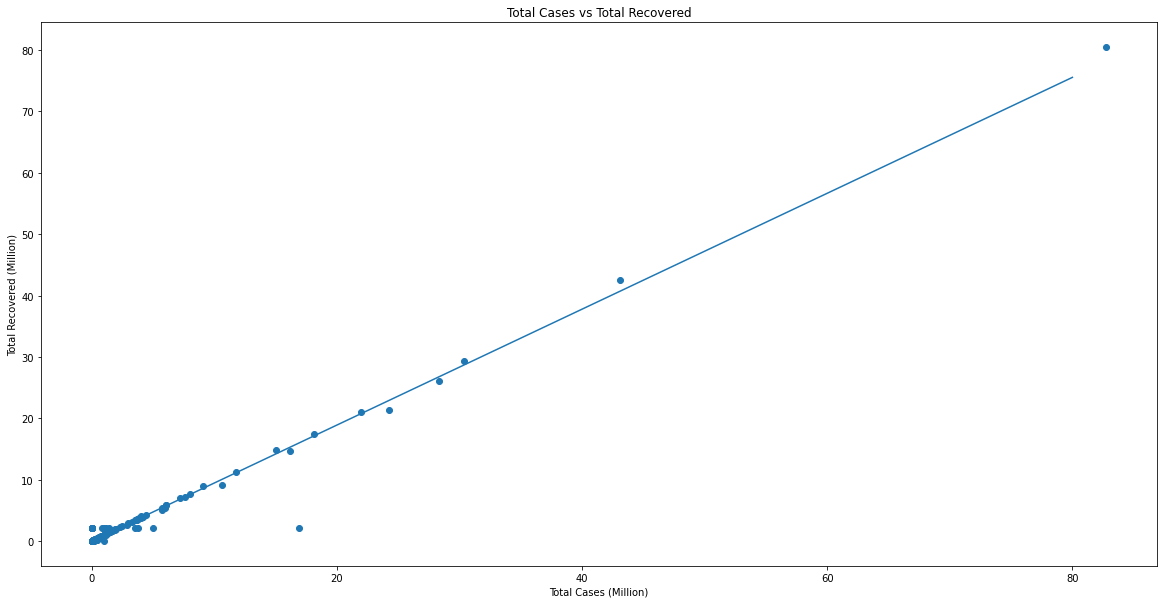

In [29]:
# Chuẩn bị dữ liệu
TotalCases_TotalDeaths = df[["TotalCases", "TotalRecovered"]]/1000000

# Linear Regression
X = np.array([TotalCases_TotalDeaths["TotalCases"]]).T
y = np.array([TotalCases_TotalDeaths["TotalRecovered"]]).T
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1)
regr = linear_model.LinearRegression(fit_intercept=False) # fit_intercept = False for calculating the bias
regr.fit(Xbar, y)

# vễ biểu đồ
x0 = np.linspace(0, 80, 2)
y0 = regr.coef_[0,0] + regr.coef_[0,1] * x0

fig = plt.figure(figsize =(20,10))
plt.scatter(TotalCases_TotalDeaths["TotalCases"], TotalCases_TotalDeaths["TotalRecovered"])
plt.plot(x0,y0)

#plt.axis([-5, 100, -0.05, 2])
plt.title("Total Cases vs Total Recovered")
plt.xlabel("Total Cases (Million)")
plt.ylabel("Total Recovered (Million)")
plt.show() 